In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import seaborn as sns

pl.style.use("seaborn-whitegrid")

In [10]:
anime = pd.read_csv("anime.csv")
rating = pd.read_csv("../../../rating.csv")

In [11]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [12]:
rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [18]:
anime.shape

(12294, 7)

In [24]:
types = anime["type"].value_counts()
types

TV         3787
OVA        3311
Movie      2348
Special    1676
ONA         659
Music       488
Name: type, dtype: int64

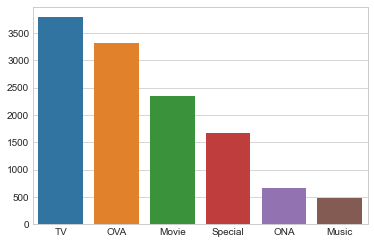

In [33]:
sns.barplot(x=types.keys(), y=types.values)
pl.show()

In [40]:
anime.rename(columns={"rating": "avg_rating"}, inplace=True)
anime.head()

,anime_id,name,genre,type,episodes,avg_rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


<AxesSubplot:>

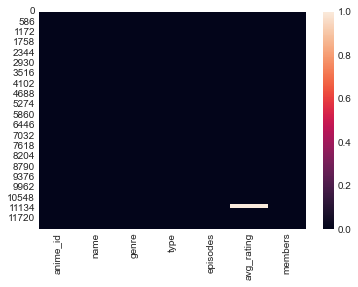

In [44]:
sns.heatmap(anime.isnull())

In [47]:
anime_df = anime.merge(rating, on="anime_id")

In [48]:
anime_df.head()

,anime_id,name,genre,type,episodes,avg_rating,members,user_id,rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1


In [50]:
anime_df.isnull().sum()

anime_id        0
name            0
genre         110
type            4
episodes        0
avg_rating      6
members         0
user_id         0
rating          0
dtype: int64

In [51]:
len(anime_df)

7813727

In [52]:
anime_df.shape

(7813727, 9)

In [53]:
anime_df.dropna(inplace=True)

In [54]:
anime_df.isnull().sum()

anime_id      0
name          0
genre         0
type          0
episodes      0
avg_rating    0
members       0
user_id       0
rating        0
dtype: int64

In [59]:
anime_df.groupby("name").count().sort_values("user_id", ascending=False).head(10)[
    "user_id"
].describe()

count       10.000000
mean     28172.800000
std       4436.430116
min      24283.000000
25%      25255.250000
50%      27344.500000
75%      29117.500000
max      39340.000000
Name: user_id, dtype: float64

In [65]:
user_rating_count_df = pd.DataFrame(anime_df.groupby("name").count()["user_id"]).rename(
    columns ={"user_id": "total_views"}
)
user_rating_count_df.head()

,total_views
name,
&quot;0&quot;,26
"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",2
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,782
&quot;Bungaku Shoujo&quot; Memoire,809
&quot;Bungaku Shoujo&quot; Movie,1535
